In [149]:
## Projet Maman

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
donnees_init = pd.read_csv('Initial.csv').set_index("Question cachée pour enregistrer l'ID anonymisé des apprenants.\xa0")
donnees_fin = pd.read_csv('Final.csv').set_index("Question cachée pour enregistrer l'ID anonymisé des apprenants.\xa0")
donnees_init = donnees_init.dropna(subset=["Date de soumission"])
donnees_fin = donnees_fin.dropna(subset=["Date de soumission"])
donnees_init = donnees_init[~donnees_init.index.duplicated()]
donnees_index= donnees_fin.index.intersection(donnees_init.index)
donnees_columns=[]
for i in list(donnees_init.columns):
    if i not in list(donnees_fin.columns):
        donnees_columns+=[i]
donnees=pd.concat([donnees_init.loc[list(donnees_index),donnees_columns],donnees_fin.loc[list(donnees_index),:]],axis=1)

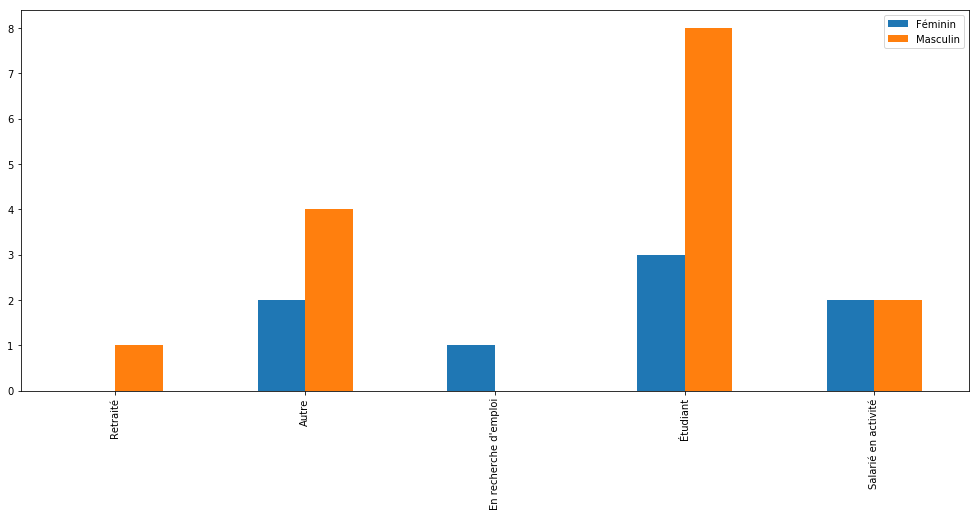

Féminin  Masculin
Retraité                     0         1
Autre                        2         4
En recherche d'emploi        1         0
Étudiant                     3         8
Salarié en activité          2         2

In [155]:
def hist_double_situation_professionnelle(colonne):
    liste_situation=list(set(donnees.loc[:,"Quelle est votre situation professionnelle ?"].values))
    liste_colonne=list(set(donnees.loc[:,colonne].values))
    if np.nan in liste_situation:
        del liste_situation[liste_situation.index(np.nan)]
    if np.nan in liste_colonne:
        del liste_colonne[liste_colonne.index(np.nan)]
    liste_dico=[]
    for situation in liste_situation:
        dico={}
        for item_colonne in liste_colonne:
            dico[item_colonne]=donnees.loc[(donnees.loc[:,"Quelle est votre situation professionnelle ?"]==situation) & (donnees.loc[:,colonne]==item_colonne),colonne].count()
        liste_dico.append(dico)
    pd.DataFrame(liste_dico,index=liste_situation).plot(kind='bar',figsize=(17,7))
    plt.show()
    return pd.DataFrame(liste_dico,index=liste_situation)

hist_double_situation_professionnelle("Indiquez votre genre :")

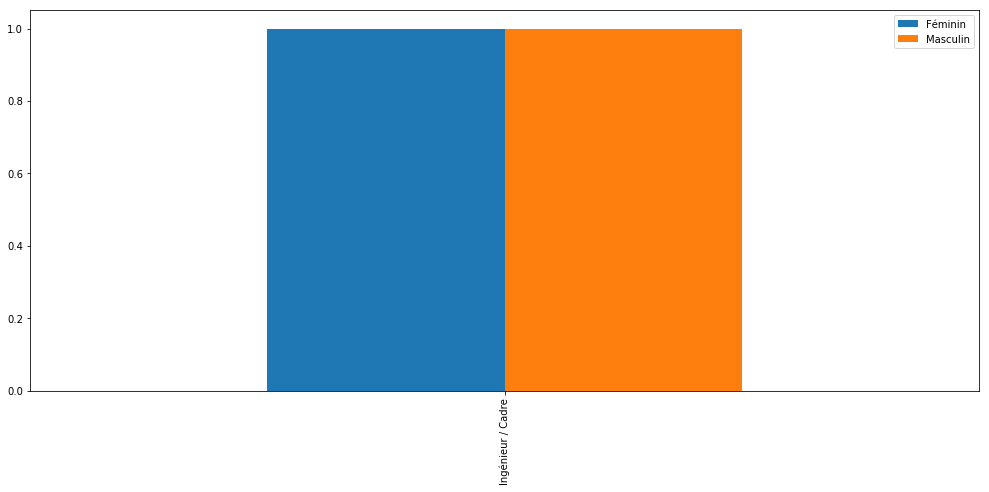

Féminin  Masculin
Ingénieur / Cadre        1         1

In [156]:
def hist_double_fonction(colonne):
    liste_fonction=list(set(donnees.loc[:,"Quelle est votre fonction ?"].values))
    liste_colonne=list(set(donnees.loc[:,colonne].values))
    if np.nan in liste_fonction:
        del liste_fonction[liste_fonction.index(np.nan)]
    if np.nan in liste_colonne:
        del liste_colonne[liste_colonne.index(np.nan)]
    liste_dico=[]
    for fonction in liste_fonction:
        dico={}
        for item_colonne in liste_colonne:
            dico[item_colonne]=donnees.loc[(donnees.loc[:,"Quelle est votre fonction ?"]==fonction) & (donnees.loc[:,colonne]==item_colonne),colonne].count()
        liste_dico.append(dico)
    pd.DataFrame(liste_dico,index=liste_fonction).plot(kind='bar',figsize=(17,7))
    plt.show()
    return pd.DataFrame(liste_dico,index=liste_fonction)

hist_double_fonction("Indiquez votre genre :")